/var/folders/h8/b0gs9wmj1ddds5ymry1g3m3w0000gn/T/ipykernel_83872/785641163.py:6: DtypeWarning: Columns (42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("nfldata.csv")


complete_pass                1.000000
pass_length_short            0.331199
pass_location_middle         0.070616
yardline_100                 0.060843
pass_location_right          0.045504
ydstogo                      0.039916
time_pressure                0.039686
game_seconds_remaining       0.029628
half_seconds_remaining       0.022504
quarter_seconds_remaining    0.019934
no_huddle                    0.011631
shotgun                      0.001041
qb_scramble                  0.000814
passer_player_id            -0.025116
qtr                         -0.025309
goal_to_go                  -0.043891
down                        -0.064914
receiver_player_id          -0.165126
pass_difficulty             -0.251866
air_yards                   -0.260381
yards_after_catch                 NaN
qb_dropback                       NaN
Name: complete_pass, dtype: float64


<Axes: >

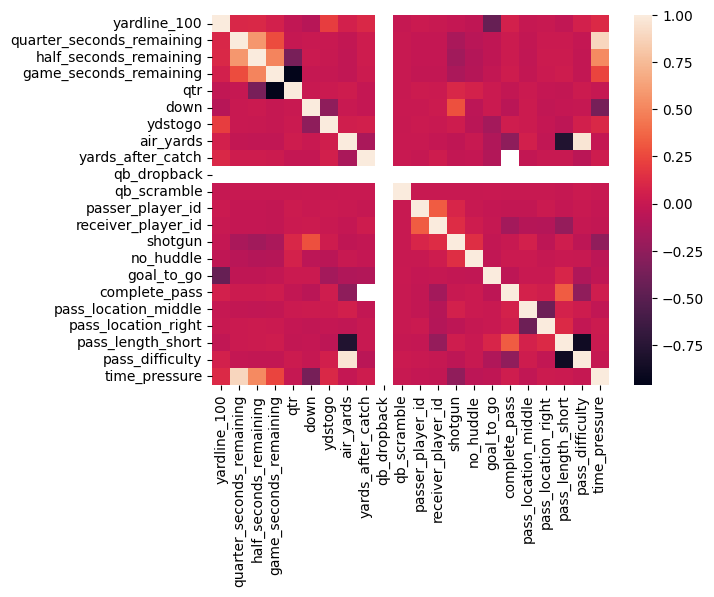

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv("nfl.csv")

encoder = LabelEncoder()

df = pd.get_dummies(df, columns=['pass_location', "pass_length"], drop_first=True)
df["passer_player_id"] = encoder.fit_transform(df["passer_player_id"])
df["receiver_player_id"] = encoder.fit_transform(df["receiver_player_id"])
df["pass_difficulty"] = df["air_yards"] / (df["pass_length_short"] + 1)
df["time_pressure"] = df["quarter_seconds_remaining"] / (df["down"] + 1)



corr_with_complete = df.corr()["complete_pass"].sort_values(ascending=False)
print(corr_with_complete)


sns.heatmap(df.corr())



In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["complete_pass"], axis=1)
y = df["complete_pass"]
